In [1]:

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import clear_output
clear_output()
import keras_ocr
# Run in case warnings should be ignored
import warnings
warnings.filterwarnings('ignore')


In [2]:

# create a pipeline with keras_ocr
# --> model with pretrained weights for detector and vectorizer
p_line = keras_ocr.pipeline.Pipeline()


Looking for C:\Users\dietm\.keras-ocr\craft_mlt_25k.h5

Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.

Looking for C:\Users\dietm\.keras-ocr\crnn_kurapan.h5


In [3]:

# getting all jpg files from several folders
p = Path("..\TextInImage_Recognition\Car_License_Plates\SeveralCountries\Countries_Europe")
filenames = [str(f) for f in p.rglob('*_labelled.jpg') if f.is_file()]


In [4]:
len(filenames)

50

In [5]:
filenames[:6]

['..\\TextInImage_Recognition\\Car_License_Plates\\SeveralCountries\\Countries_Europe\\Estonia\\files\\domain2\\0003596_labelled.jpg',
 '..\\TextInImage_Recognition\\Car_License_Plates\\SeveralCountries\\Countries_Europe\\Estonia\\files\\domain2\\0011641_labelled.jpg',
 '..\\TextInImage_Recognition\\Car_License_Plates\\SeveralCountries\\Countries_Europe\\Estonia\\files\\domain2\\0012359_labelled.jpg',
 '..\\TextInImage_Recognition\\Car_License_Plates\\SeveralCountries\\Countries_Europe\\Estonia\\files\\domain2\\0016133_labelled.jpg',
 '..\\TextInImage_Recognition\\Car_License_Plates\\SeveralCountries\\Countries_Europe\\Estonia\\files\\domain2\\0019254_labelled.jpg',
 '..\\TextInImage_Recognition\\Car_License_Plates\\SeveralCountries\\Countries_Europe\\Estonia\\files\\domain2\\0019637_labelled.jpg']

In [6]:
df01 = pd.DataFrame(columns=['Country','Car_License_Plate'])

In [7]:
df01

Empty DataFrame
Columns: [Country, Car_License_Plate]
Index: []

In [8]:
list_countries = []
for i in filenames:
    list_strings = i.split('\\')
    for j in list_strings:
        if j =='Estonia' or j =='Finland' or j =='Lithuania' or j=='Serbia':
            list_countries.append(j)
len(list_countries)

50

In [9]:
df01.Country = list_countries
df01.sample(5)

Country Car_License_Plate
29  Lithuania               NaN
25  Lithuania               NaN
6     Estonia               NaN
40     Serbia               NaN
18    Finland               NaN

In [10]:

# getting the images
images = [keras_ocr.tools.read(i) for i in filenames]


In [11]:
type(images)

list

In [12]:
len(images)

50

In [13]:

# pipeline recognizer on the images --> predictions about the text in it
preds = p_line.recognize(images=images)


10/10 [==============================] - 37s 3s/step


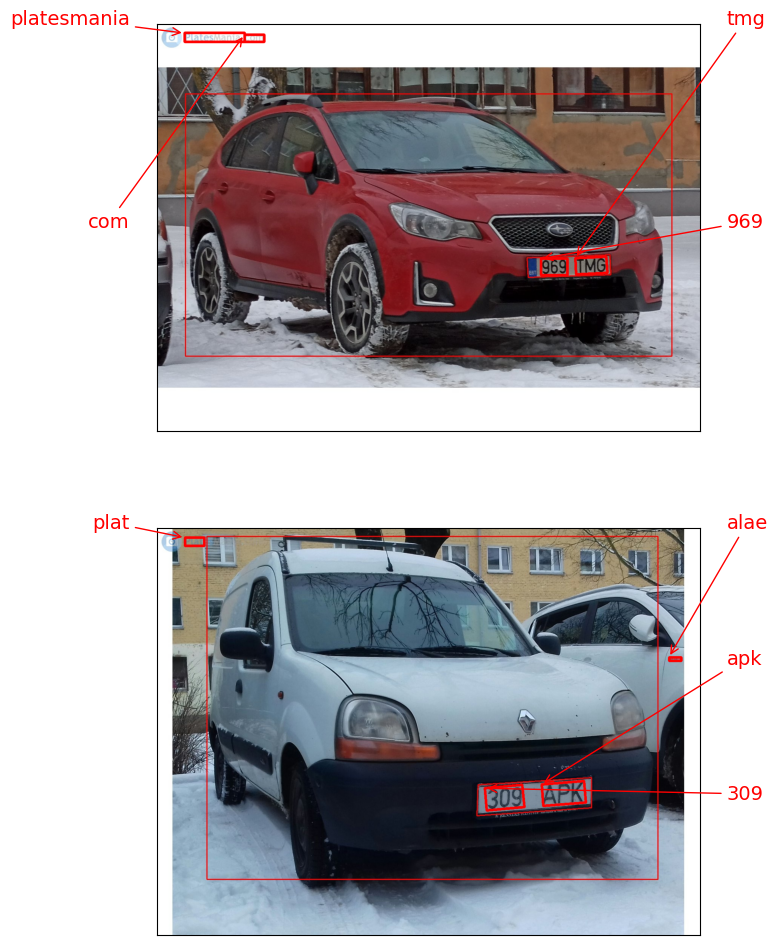

In [14]:

# plot the text predictions of 2 images
fig, ax = plt.subplots(nrows=2, figsize=(7, 12))
for ax, image, predictions in zip(ax, images[1:3], preds[1:3]):
    keras_ocr.tools.drawAnnotations(image=image,predictions=predictions,ax=ax)


In [15]:

# function for getting the text of the images
def get_text_img(prediction_list):
    list_t_all = []
    list_indices = [i for i in range(len(prediction_list))]
    for i in list_indices:
        list_t = []
        for t,b in prediction_list[i]:
            list_t.append(t)
        list_t_all.append(list_t)
    return list_t_all


In [16]:

# text of all images in a dictionary
dict_text_all = get_text_img(preds)
dict_text_all


[['ibzmx', 'ig'],
 ['platesmania', 'com', 'tmg', '969'],
 ['plat', 'alae', 'apk', '309'],
 ['aletie', 'e', 'coo', 'tlj', '562', 'est', 'tey'],
 ['eas', 'bph', '819'],
 ['platesmania', 'com', '', 'ses', 'captur', '291', 'itnn'],
 ['okrone',
  'trailler',
  'renital',
  'wwwredrentee',
  'nlee',
  'red',
  'ouai',
  'yup',
  '914',
  'esi',
  'krone',
  'none',
  'orone',
  'igoz'],
 ['udou', 'c3', '999', 'aax', 'la', 'be', 'rus'],
 ['platesmania', 'com', '429', 'bkc', 'est', 'lels', 'rxoson'],
 ['l', 'soo', 'o', 'vugro', 'fhia', 'a', 'son', 'igoz'],
 ['jkc376', 'fin'],
 ['0',
  'ouflo',
  'vu',
  'platesm',
  'looelh',
  '80018100',
  'parkimiskella',
  'kasutamisel',
  'p',
  'tasuta',
  'bu',
  'min',
  'mtsubisn',
  'ms669',
  'i'],
 ['osuns', 'clse48'],
 ['platesmania', 'com', 'volvo', 'uzg599'],
 ['d', 'a', 'an', 'kta', 'nisubs', 'guz', 'l'],
 ['plates', 'claoo', 'rrb2d0'],
 ['bz2z7'],
 ['tlonet', 'koy91z', 'fin', 'codic'],
 ['toen', 'centrs', 'skaistuma', '0ru787'],
 ['lada', 'sam

In [17]:

# number of texts in the single images
[len(dict_text_all[i]) for i in range(len(dict_text_all))]


[2,
 4,
 4,
 7,
 3,
 7,
 14,
 7,
 7,
 8,
 2,
 15,
 2,
 4,
 7,
 3,
 1,
 4,
 4,
 4,
 5,
 3,
 3,
 5,
 3,
 5,
 4,
 6,
 5,
 9,
 8,
 14,
 2,
 9,
 11,
 15,
 9,
 14,
 1,
 20,
 6,
 6,
 4,
 3,
 3,
 6,
 10,
 2,
 6,
 6]

In [18]:

# the last 2 elements of the texts (in wrong order) normally are the right ones in the image
dict_text_all[1][-2:]


['tmg', '969']

In [25]:

# the 2 elements in correct order into a list
list_plates = []
for i in range(len(dict_text_all)):
    if len(dict_text_all[i]) > 1 and len((dict_text_all[i][-1] + " " + dict_text_all[i][-2])) < 12:
        list_plates.append((dict_text_all[i][-1] + " " + dict_text_all[i][-2]))
    else:
        list_plates.append("---")
list_plates


['ig ibzmx',
 '969 tmg',
 '309 apk',
 'tey est',
 '819 bph',
 'itnn 291',
 'igoz orone',
 'rus be',
 'rxoson lels',
 'igoz son',
 'fin jkc376',
 'i ms669',
 '---',
 '---',
 'l guz',
 '---',
 '---',
 'codic fin',
 '---',
 'ybr603 dool',
 '---',
 'ogl kcle',
 'sac ktd',
 'ljp 324',
 'grh 391',
 'fbg 9ll',
 '358 hut',
 'geu 519',
 '---',
 'rus ffg',
 '---',
 '---',
 '---',
 '1812sl bge',
 '4277 fo',
 '---',
 '4184 e20',
 '---',
 '---',
 '---',
 't ni',
 'sr 162orv',
 '1445bi bg',
 'niezsni com',
 '---',
 '---',
 'beoarons 5r',
 'bg 157orr',
 'oncn ca',
 '---']

In [26]:

# filling the second feature
df01.Car_License_Plate = list_plates


In [29]:

# with higher quality of the images you get better results 
df01


Country Car_License_Plate
0     Estonia          ig ibzmx
1     Estonia           969 tmg
2     Estonia           309 apk
3     Estonia           tey est
4     Estonia           819 bph
5     Estonia          itnn 291
6     Estonia        igoz orone
7     Estonia            rus be
8     Estonia       rxoson lels
9     Estonia          igoz son
10    Finland        fin jkc376
11    Finland           i ms669
12    Finland               ---
13    Finland               ---
14    Finland             l guz
15    Finland               ---
16    Finland               ---
17    Finland         codic fin
18    Finland               ---
19    Finland       ybr603 dool
20  Lithuania               ---
21  Lithuania          ogl kcle
22  Lithuania           sac ktd
23  Lithuania           ljp 324
24  Lithuania           grh 391
25  Lithuania           fbg 9ll
26  Lithuania           358 hut
27  Lithuania           geu 519
28  Lithuania               ---
29  Lithuania           rus ffg
30     Serbia               ---
31     Serbia               ---
32     Serbia               ---
33     Serbia        1812sl bge
34     Serbia           4277 fo
35     Serbia               ---
36     Serbia          4184 e20
37     Serbia               ---
38     Serbia               ---
39     Serbia               ---
40     Serbia              t ni
41     Serbia         sr 162orv
42     Serbia         1445bi bg
43     Serbia       niezsni com
44     Serbia               ---
45     Serbia               ---
46     Serbia       beoarons 5r
47     Serbia         bg 157orr
48     Serbia           oncn ca
49     Serbia               ---

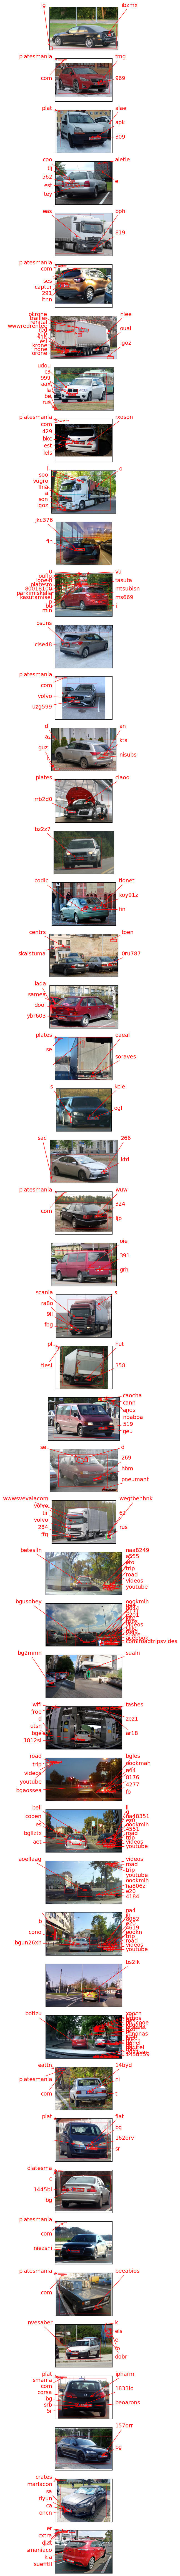

In [34]:

# plot the text predictions of all pictures
fig, ax = plt.subplots(nrows=50, figsize=(150, 120))
for ax, image, predictions in zip(ax, images, preds):
    keras_ocr.tools.drawAnnotations(image=image,predictions=predictions,ax=ax)
